# Desafío Técnico
#### DB: db-rkd-da.db

## Librerías

In [155]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Explorar DB

### Crear Conexión

In [156]:
conn = sqlite3.connect('db-rkd-da.db') 
cursor = conn.cursor() # el cursor es creado para que luego podamos hacer las consultas, es decir ejecutra las Queryes en SQL

### Consultar tablas y crear el Dataframe para cada una de ellas

#### Exploramos las tablas

In [157]:
# Ejecutar una consulta para obtener los nombres de las tablas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")

# Recuperar los resultados de la consulta
nombres_tablas = cursor.fetchall()

# Imprimir los nombres de las tablas
for tabla in nombres_tablas:
    print(tabla[0])

categorias
marcas
productos
provincias
vendedores
ventas


#### Consultar tablas y convertir en Data frame

##### VENTAS

In [158]:
# buscamos los encabezados de la tabla ventas
cursor.execute("PRAGMA table_info(ventas)")
columnas = cursor.fetchall()
nombres_columnas = [col[1] for col in columnas]

# Consultamos la tabla
consulta_ventas = cursor.execute('''SELECT * FROM ventas''')
# Crear Dataframe con la consulta anterior
ventas = pd.DataFrame(consulta_ventas, columns = nombres_columnas)

ventas.head()

,periodo,id_vendedor,id_marca,id_prod,id_categoria,unidades,tipo_dom
0,202201,2159470,4147,9070,5,3,S
1,202201,2159470,4147,9070,5,3,P
2,202201,2159470,7072,8818,5,5,S
3,202201,2159470,7072,8818,5,5,P
4,202201,2159470,1970820,4995541,5,2,S


##### CATEGORIAS

In [159]:
# buscamos los encabezados de la tabla ventas
cursor.execute("PRAGMA table_info(categorias)")
columnas = cursor.fetchall()
nombres_columnas = [col[1] for col in columnas]

# Consultamos la tabla
consulta_categorias = cursor.execute('''SELECT * FROM categorias''')
# Crear Dataframe con la consulta anterior
categorias = pd.DataFrame(consulta_categorias, columns = nombres_columnas)

categorias.head()

,id,categoria
0,1,CREMAS
1,2,PERFUMES
2,3,SHAMPOO
3,4,CREMA PARA EL PELO
4,5,JABONES


##### MARCAS

In [160]:
# buscamos los encabezados de la tabla ventas
cursor.execute("PRAGMA table_info(marcas)")
columnas = cursor.fetchall()
nombres_columnas = [col[1] for col in columnas]

# Consultamos la tabla
consulta_marcas = cursor.execute('''SELECT * FROM marcas''')
# Crear Dataframe con la consulta anterior
marcas = pd.DataFrame(consulta_marcas, columns = nombres_columnas)

marcas.head()

,id,marca,id_categoria
0,1904064,MARCA 88,3
1,3994,MARCA 164,2
2,1226604,MARCA 165,4
3,4017,MARCA 166,3
4,4065,MARCA 167,2


##### PRODUCTOS

In [161]:
# buscamos los encabezados de la tabla ventas
cursor.execute("PRAGMA table_info(productos)")
columnas = cursor.fetchall()
nombres_columnas = [col[1] for col in columnas]

# Consultamos la tabla
consulta_productos = cursor.execute('''SELECT * FROM productos''')
# Crear Dataframe con la consulta anterior
productos = pd.DataFrame(consulta_productos, columns = nombres_columnas)

productos.head()

,id,producto,id_marca,id_categoria
0,6704,PRODUCTO 374,2627,5
1,6703,PRODUCTO 368,2627,5
2,9552,PRODUCTO 369,2627,5
3,1530859,PRODUCTO 364,2627,5
4,1375781,PRODUCTO 365,2627,5


##### PROVINCIAS

In [162]:
# buscamos los encabezados de la tabla ventas
cursor.execute("PRAGMA table_info(provincias)")
columnas = cursor.fetchall()
nombres_columnas = [col[1] for col in columnas]

# Consultamos la tabla
consulta_provincias = cursor.execute('''SELECT * FROM provincias''')
# Crear Dataframe con la consulta anterior
provincias = pd.DataFrame(consulta_provincias, columns = nombres_columnas)

provincias.head()

,id,provincia,capital
0,1,BUENOS AIRES,LA PLATA
1,1-1,BUENOS AIRES,-
2,1-2,CABA,-
3,2,CATAMARCA,SAN FERNANDO DEL VALLE DE CATAMARCA
4,3,CHACO,RESISTENCIA


##### VENDEDORES

In [163]:
# buscamos los encabezados de la tabla ventas
cursor.execute("PRAGMA table_info(vendedores)")
columnas = cursor.fetchall()
nombres_columnas = [col[1] for col in columnas]

# Consultamos la tabla
consulta_vendedores = cursor.execute('''SELECT * FROM vendedores''')
# Crear Dataframe con la consulta anterior
vendedores = pd.DataFrame(consulta_vendedores, columns = nombres_columnas)

vendedores.head()

,id,nombre,id_provincia
0,66475,ANDREANI SILVINA,19
1,157172,LOPEZ ALEJANDRO,19
2,2990,GARCIA JOSEFINA,24
3,12864,BONFIGLIO TOMAS,24
4,69667,SILVA FABIAN,5


### Exploración de tabla de hechos (Ventas)

In [164]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periodo       20000 non-null  int64 
 1   id_vendedor   20000 non-null  int64 
 2   id_marca      20000 non-null  int64 
 3   id_prod       20000 non-null  int64 
 4   id_categoria  20000 non-null  int64 
 5   unidades      20000 non-null  int64 
 6   tipo_dom      20000 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.1+ MB


#### Cambiar tipos de datos

In [165]:
#transformo el periodo en tipo fecha
ventas['periodo'] = pd.to_datetime(ventas['periodo'], format='%Y%m')
ventas.head()

,periodo,id_vendedor,id_marca,id_prod,id_categoria,unidades,tipo_dom
0,2022-01-01,2159470,4147,9070,5,3,S
1,2022-01-01,2159470,4147,9070,5,3,P
2,2022-01-01,2159470,7072,8818,5,5,S
3,2022-01-01,2159470,7072,8818,5,5,P
4,2022-01-01,2159470,1970820,4995541,5,2,S


## Resolución de Consignas

### 1- Top 10 de vendedores según ventas utilizando windows function.

##### Se hace la unión de las tablas creando un nuevo df

In [166]:
Top10_ = ventas.merge(vendedores, how='left', left_on=ventas['id_vendedor'], right_on=vendedores['id']) 
Top10_.head()

,key_0,periodo,id_vendedor,id_marca,id_prod,id_categoria,unidades,tipo_dom,id,nombre,id_provincia
0,2159470,2022-01-01,2159470,4147,9070,5,3,S,2159470,SORIA SOFIA,1
1,2159470,2022-01-01,2159470,4147,9070,5,3,P,2159470,SORIA SOFIA,1
2,2159470,2022-01-01,2159470,7072,8818,5,5,S,2159470,SORIA SOFIA,1
3,2159470,2022-01-01,2159470,7072,8818,5,5,P,2159470,SORIA SOFIA,1
4,2159470,2022-01-01,2159470,1970820,4995541,5,2,S,2159470,SORIA SOFIA,1


##### Se extraen solo las columnas a utilizar

In [167]:
Top10_ = Top10_[['nombre','unidades']]
Top10_.head()

,nombre,unidades
0,SORIA SOFIA,3
1,SORIA SOFIA,3
2,SORIA SOFIA,5
3,SORIA SOFIA,5
4,SORIA SOFIA,2


##### Renombrar columna

In [168]:
Top10_.rename(columns={'nombre':'vendedor'}, inplace=True)
Top10_.head()

,vendedor,unidades
0,SORIA SOFIA,3
1,SORIA SOFIA,3
2,SORIA SOFIA,5
3,SORIA SOFIA,5
4,SORIA SOFIA,2


##### Calcular el acumulativo de unidades vendidas y ordenar de mayor a menor

In [169]:
# Se hace la suma y se agrupa por vendedor
Top10 = Top10_.groupby('vendedor')['unidades'].sum()
Top10.head()

vendedor
ANDREANI SILVINA        3324
BARRIOS RAFAEL          2280
BONFIGLIO TOMAS         1924
CABALLERO CLAUDIA       1787
CACERES OSCAR MIGUEL    1953
Name: unidades, dtype: int64

In [170]:
# Convertir a DF porque, como bien se observa, deja de ser un df
Top10 = pd.DataFrame({'vendedor': Top10.index, 'total_unidades': Top10.values})  
Top10.head()

,vendedor,total_unidades
0,ANDREANI SILVINA,3324
1,BARRIOS RAFAEL,2280
2,BONFIGLIO TOMAS,1924
3,CABALLERO CLAUDIA,1787
4,CACERES OSCAR MIGUEL,1953


##### Crear el Ranking de vendedores

In [171]:
Top10_rank = Top10
Top10_rank['ranking'] =Top10_rank['total_unidades'].rank(ascending=False).astype(int)

# se hace el ordenamiento en base al ranking y luego se expone los primeros 10
Top10_rank.sort_values(by='ranking',ascending=True).head(10)

,vendedor,total_unidades,ranking
16,LOPEZ ALEJANDRO,3721,1
9,GARCIA JOSEFINA,3557,2
0,ANDREANI SILVINA,3324,3
26,SILVA FABIAN,2988,4
5,DE MONACO HELENA,2694,5
14,HERRERA MARTIN,2666,6
21,PEREZ MARTIN,2462,7
20,MOSES NICOLAS,2452,8
6,DI SALVO AGUSTIN,2442,9
27,SORIA SOFIA,2340,10


#### RESULTADO

##### Filtramos el df para que solo queden aquellos que el ranking sea <=10

In [172]:
Top10_rank_filtro = Top10_rank[Top10_rank['ranking']<=10]
Top10_rank_filtro.sort_values(by='ranking', ascending=True)

,vendedor,total_unidades,ranking
16,LOPEZ ALEJANDRO,3721,1
9,GARCIA JOSEFINA,3557,2
0,ANDREANI SILVINA,3324,3
26,SILVA FABIAN,2988,4
5,DE MONACO HELENA,2694,5
14,HERRERA MARTIN,2666,6
21,PEREZ MARTIN,2462,7
20,MOSES NICOLAS,2452,8
6,DI SALVO AGUSTIN,2442,9
27,SORIA SOFIA,2340,10


##### GRAFICAMOS RESULTADOS

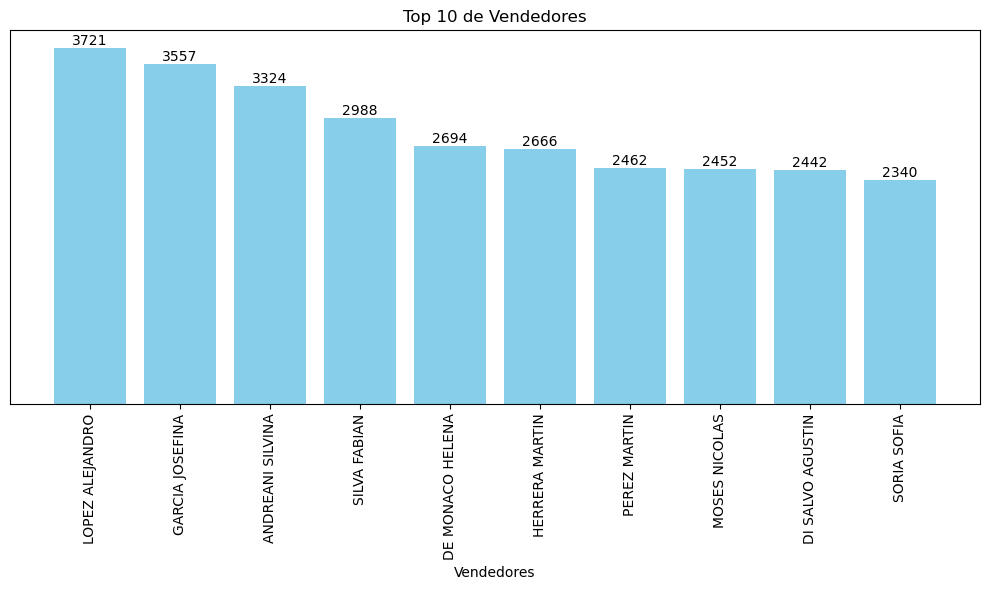

In [173]:
# Ordeno el df porque en el anterior no fue guardado el ordenamiento
Top10_rank_filtro = Top10_rank_filtro.sort_values(by='ranking', ascending=True)

plt.figure(figsize=(10,6))
bars = plt.bar(Top10_rank_filtro['vendedor'], Top10_rank_filtro['total_unidades'], color='skyblue')

# Ocultar el eje Y
plt.gca().axes.get_yaxis().set_visible(False)

# Colocar etiquetas de datos en el extremo superior de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Top 10 de Vendedores')
plt.xlabel('Vendedores')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### 2- Por vendedor, exponer la variación en ventas vs el mes anterior.

##### Como debemos comparar con el mes anterior, agruparé por medio de una suma, luego crearé una tabla con el mes desplazado y posterior a esto, se hace un merge entre tablas para luego hacer el calculo correspondiente.

In [174]:
df_actual = ventas.groupby(['periodo','id_vendedor'])['unidades'].sum()
df_actual=df_actual.reset_index()
df_actual.head()

,periodo,id_vendedor,unidades
0,2021-01-01,392,612
1,2021-01-01,399,494
2,2021-01-01,2990,850
3,2021-01-01,3295,616
4,2021-01-01,4870,906


In [175]:
df_mes_anterior = df_actual
df_mes_anterior['periodo_anterior'] =  df_mes_anterior['periodo']-pd.DateOffset(months=-1)
df_mes_anterior=df_mes_anterior[['id_vendedor',	'unidades',	'periodo_anterior']]
df_mes_anterior.head()

,id_vendedor,unidades,periodo_anterior
0,392,612,2021-02-01
1,399,494,2021-02-01
2,2990,850,2021-02-01
3,3295,616,2021-02-01
4,4870,906,2021-02-01


##### Hacemos el Merge de ambas tablas para luego hacer el calculo de diferencia

In [176]:
df_diff = df_actual.merge(df_mes_anterior, how='left', left_on=df_actual.periodo, right_on=df_mes_anterior.periodo_anterior)
df_diff.tail()

,key_0,periodo,id_vendedor_x,unidades_x,periodo_anterior_x,id_vendedor_y,unidades_y,periodo_anterior_y
3655,2022-03-01,2022-03-01,2159470,156,2022-04-01,964494.0,350.0,2022-03-01
3656,2022-03-01,2022-03-01,2159470,156,2022-04-01,1002653.0,281.0,2022-03-01
3657,2022-03-01,2022-03-01,2159470,156,2022-04-01,1659009.0,136.0,2022-03-01
3658,2022-03-01,2022-03-01,2159470,156,2022-04-01,1749665.0,331.0,2022-03-01
3659,2022-03-01,2022-03-01,2159470,156,2022-04-01,2159470.0,295.0,2022-03-01


In [177]:
df_diff['variacion_mensual%'] = round((df_diff['unidades_x']/df_diff['unidades_y'])-1,4)*100
df_diff.tail()

,key_0,periodo,id_vendedor_x,unidades_x,periodo_anterior_x,id_vendedor_y,unidades_y,periodo_anterior_y,variacion_mensual%
3655,2022-03-01,2022-03-01,2159470,156,2022-04-01,964494.0,350.0,2022-03-01,-55.43
3656,2022-03-01,2022-03-01,2159470,156,2022-04-01,1002653.0,281.0,2022-03-01,-44.48
3657,2022-03-01,2022-03-01,2159470,156,2022-04-01,1659009.0,136.0,2022-03-01,14.71
3658,2022-03-01,2022-03-01,2159470,156,2022-04-01,1749665.0,331.0,2022-03-01,-52.87
3659,2022-03-01,2022-03-01,2159470,156,2022-04-01,2159470.0,295.0,2022-03-01,-47.12


#### RESULTADO

In [178]:
df_diff = df_diff[['periodo','unidades_x','variacion_mensual%']]
df_diff.rename(columns={'unidades_x':'unidades'}, inplace=True)
df_diff.tail()

,periodo,unidades,variacion_mensual%
3655,2022-03-01,156,-55.43
3656,2022-03-01,156,-44.48
3657,2022-03-01,156,14.71
3658,2022-03-01,156,-52.87
3659,2022-03-01,156,-47.12


### 3- Exponer el id de los vendedores que hayan realizado ventas superiores a 200 perfumes en Córdoba.

In [179]:
vtas_perfumes = ventas.merge(categorias, how='left', left_on=ventas['id_categoria'], right_on=categorias['id'])
vtas_perfumes = vtas_perfumes.groupby(['id_vendedor','categoria'])['unidades'].sum()
vtas_perfumes = vtas_perfumes.reset_index()
vtas_perfumes = vtas_perfumes[(vtas_perfumes.categoria == 'PERFUMES') & (vtas_perfumes.unidades > 200)]
vtas_perfumes

,id_vendedor,categoria,unidades
3,392,PERFUMES,780
8,399,PERFUMES,621
13,2990,PERFUMES,1359
18,3295,PERFUMES,244
23,4870,PERFUMES,449
28,12864,PERFUMES,1076
33,17850,PERFUMES,522
38,17899,PERFUMES,428
48,32346,PERFUMES,554
52,47215,PERFUMES,1502


### 4- Bonus: Programar un Stored Procedure que tome como parámetro un año e indique las 5 provincias con menor cantidad de ventas para el año en cuestión.

In [ ]:
# Da error y se estima que es porque sqlite no soporta stored procedure
sql_script='''CREATE PROCEDURE provincias_menos_ventas 
(@anio INT = 2021)
AS
BEGIN
	SELECT
		vtas.periodo,
		p.provincia,
		SUM(vtas.unidades) AS cant
	FROM 
		ventas AS vtas 
		LEFT JOIN vendedores AS vdor ON vtas.id_vendedor = vdor.id
        LEFT JOIN provincias AS p ON vdor.id_provincia = p.id
	WHERE SUBSTR(periodo,1,4) = @anio
	GROUP BY vtas.periodo, p.provincia
	ORDER BY cant ASC
    LIMIT 5
END
'''

cursor.executescript(sql_script)
conn.commit()
conn.close()